In [1]:
import tensorflow as tf

import os
import pathlib
import time
import datetime
import numpy as np
import io_utils

from matplotlib import pyplot as plt
from IPython import display

print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.8.0


In [2]:
if tf.test.gpu_device_name(): 
    print("Default GPU: {}".format(tf.test.gpu_device_name()))
else:
    print("Not using a GPU - it will take long!!")

Default GPU: /device:GPU:0


In [3]:
from configuration import *
print("DATASET_SIZE", DATASET_SIZE)
print("TRAIN_SIZE", TRAIN_SIZE)
print("TEST_SIZE", TEST_SIZE)

np.random.seed(SEED)
tf.random.set_seed(SEED)

DATASET_SIZE 294
TRAIN_SIZE 250
TEST_SIZE 44


In [4]:
from dataset_utils import create_image_loader

train_dataset = tf.data.Dataset.range(TRAIN_SIZE).shuffle(TRAIN_SIZE)
test_dataset = tf.data.Dataset.range(TEST_SIZE).shuffle(TEST_SIZE)

f2r_train_dataset = train_dataset.map(create_image_loader(2, 3, TRAIN_SIZES, "train"), num_parallel_calls=tf.data.AUTOTUNE)
f2r_train_dataset = f2r_train_dataset.batch(BATCH_SIZE)
f2r_test_dataset = test_dataset.map(create_image_loader(2, 3, TEST_SIZES, "test"))
f2r_test_dataset = f2r_test_dataset.batch(BATCH_SIZE)

f2b_train_dataset = train_dataset.map(create_image_loader(2, 0, TRAIN_SIZES, "train"), num_parallel_calls=tf.data.AUTOTUNE)
f2b_train_dataset = f2b_train_dataset.batch(BATCH_SIZE)
f2b_test_dataset = test_dataset.map(create_image_loader(2, 0, TEST_SIZES, "test"))
f2b_test_dataset = f2b_test_dataset.batch(BATCH_SIZE)

f2l_train_dataset = train_dataset.map(create_image_loader(2, 1, TRAIN_SIZES, "train"), num_parallel_calls=tf.data.AUTOTUNE)
f2l_train_dataset = f2l_train_dataset.batch(BATCH_SIZE)
f2l_test_dataset = test_dataset.map(create_image_loader(2, 1, TEST_SIZES, "test"))
f2l_test_dataset = f2l_test_dataset.batch(BATCH_SIZE)

Last 500 steps took: 929.58s
Estimated time to finish: 497.94min



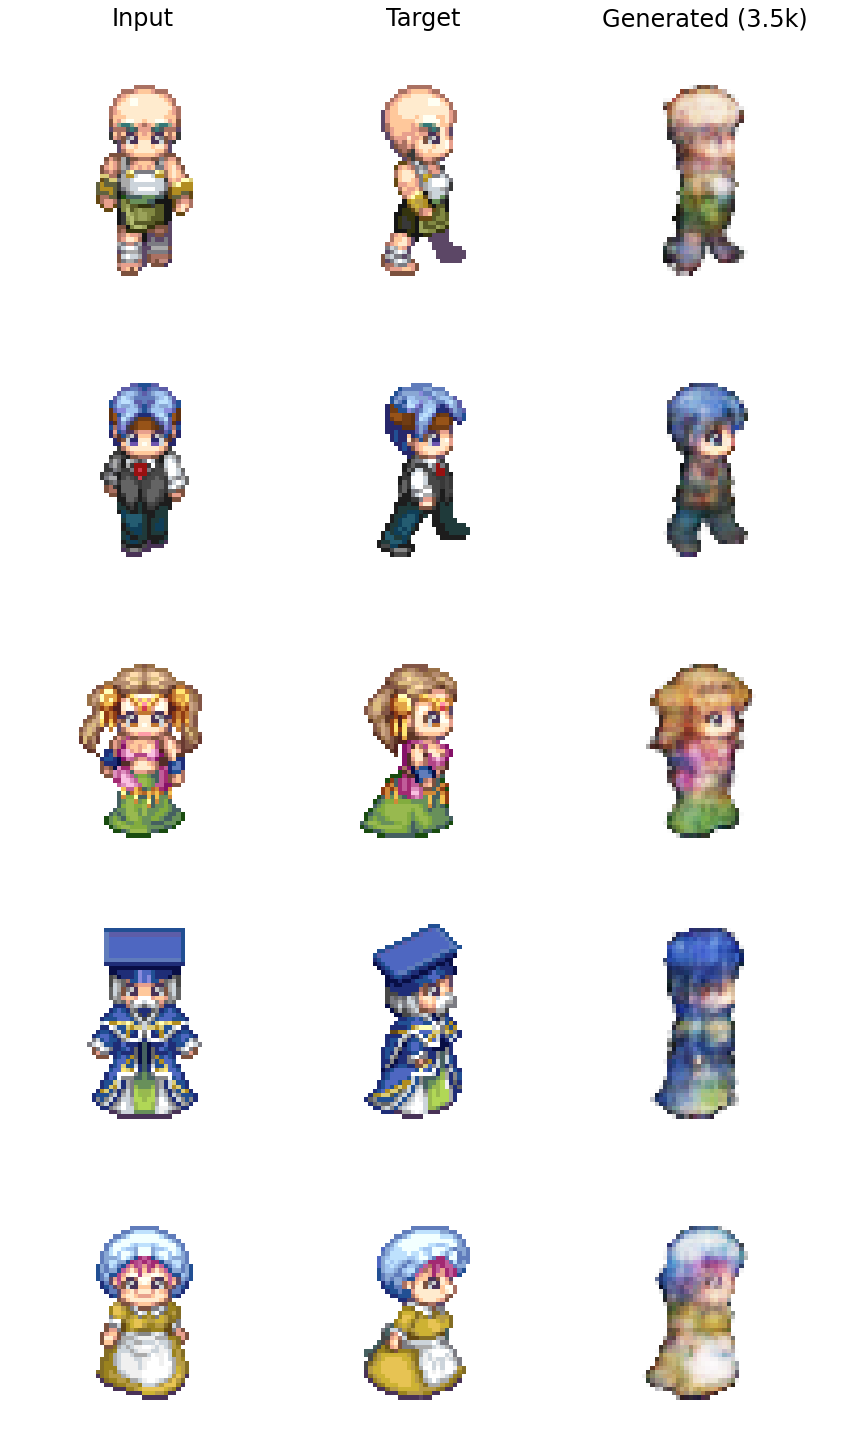

Showing discriminator patches


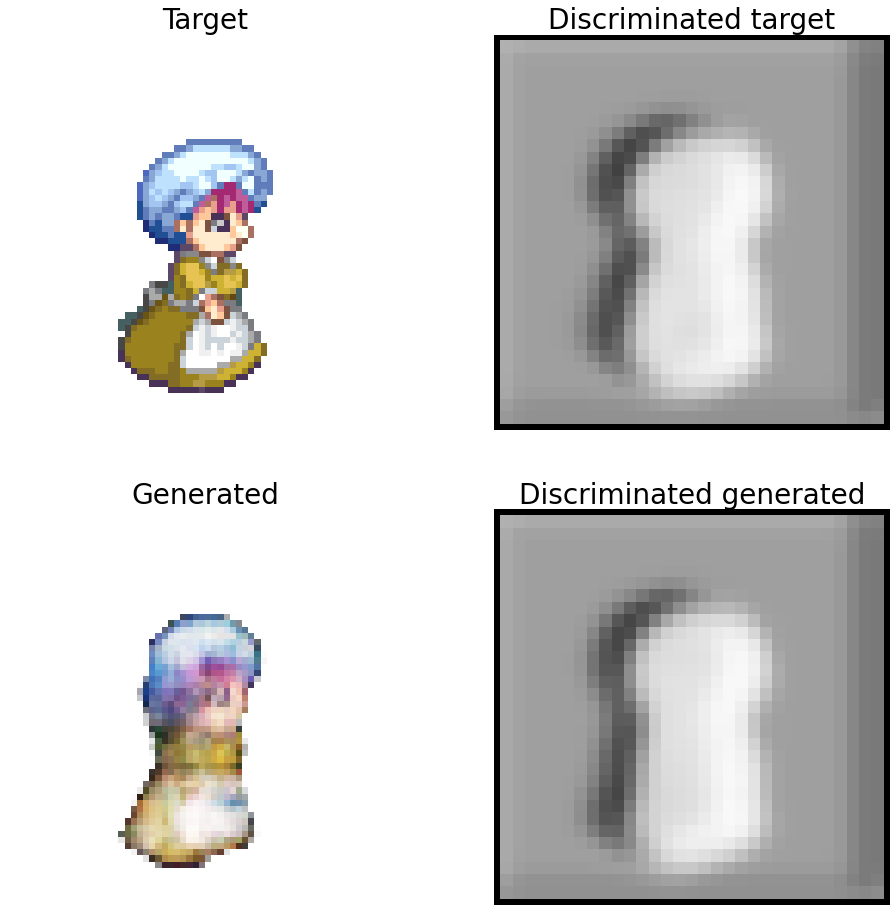

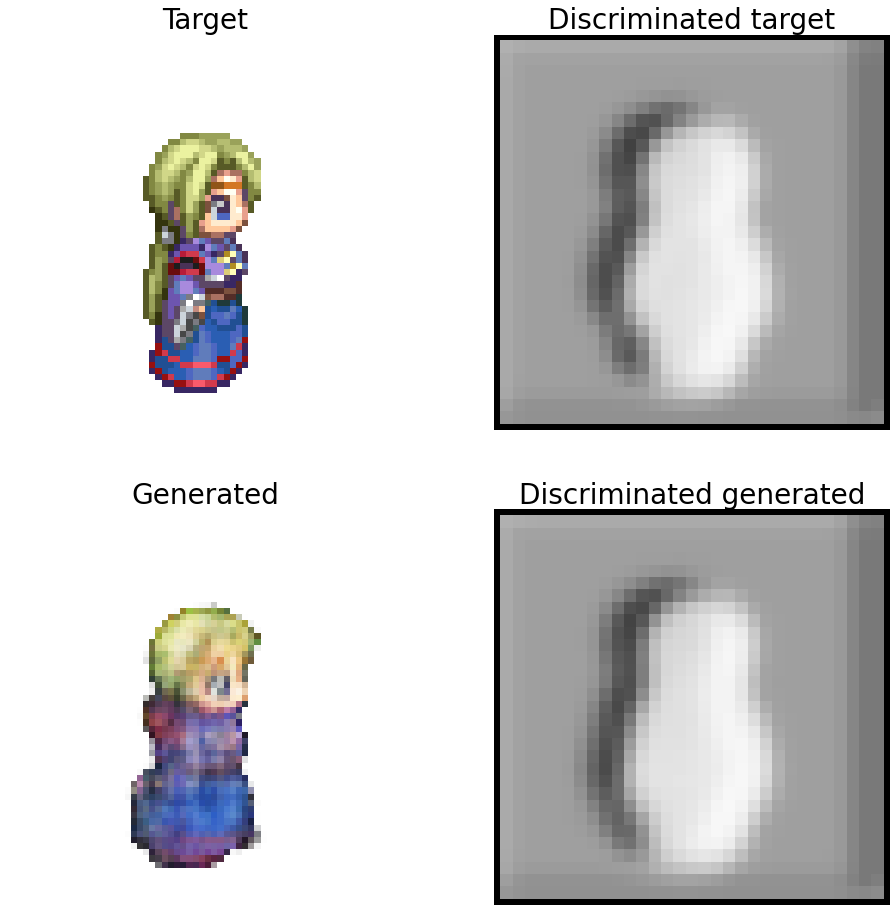

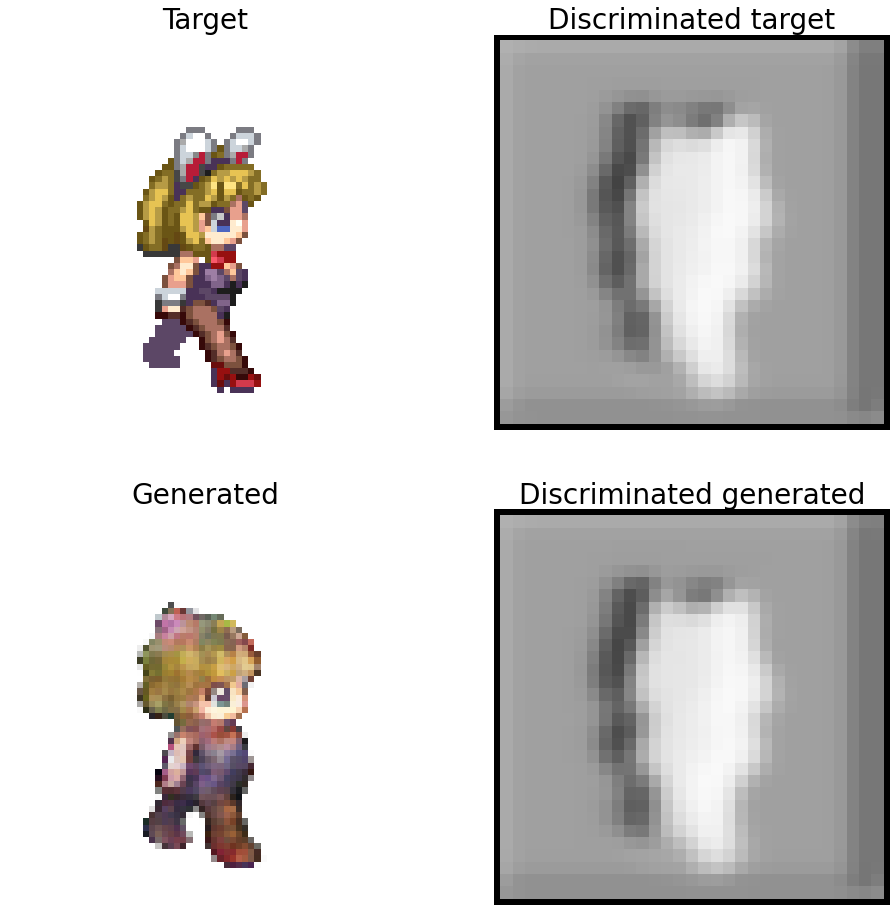

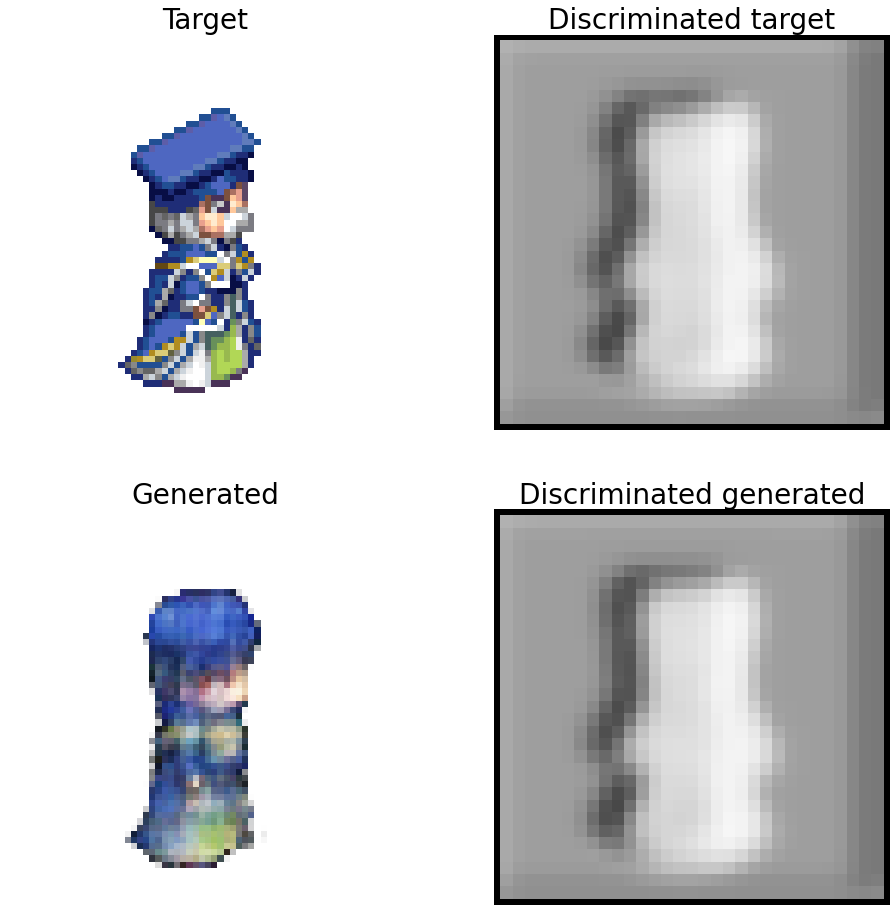

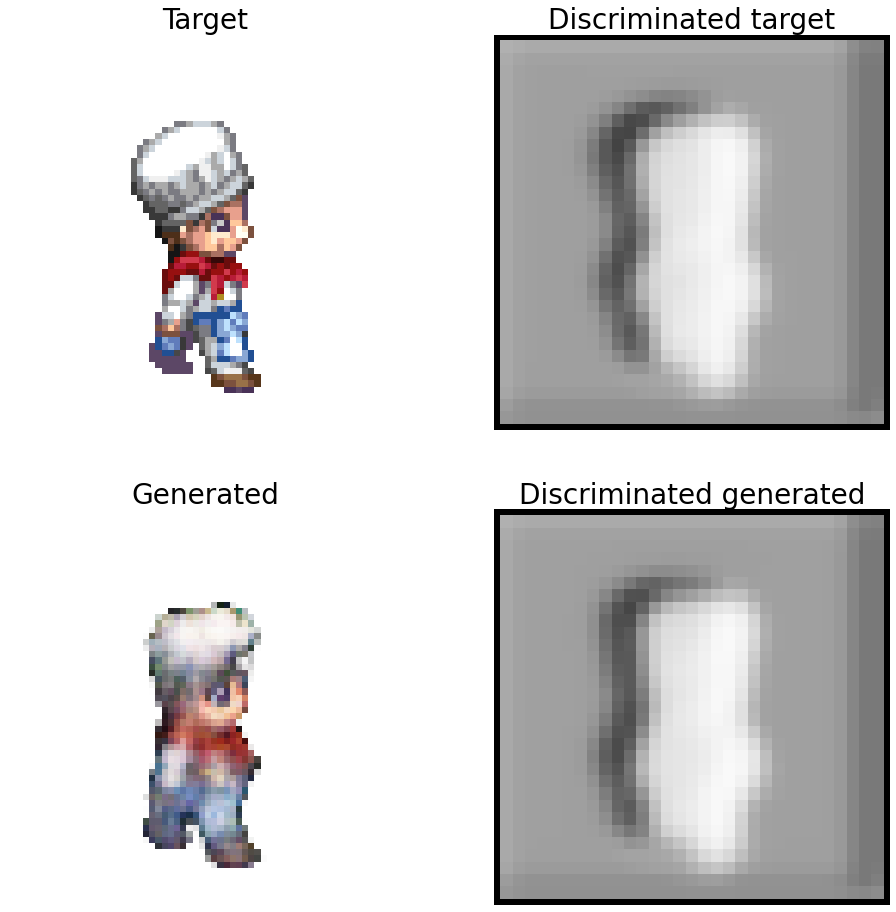

Step: 3.5k
˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯˯
..........

In [ ]:
from pix2pix_model import Pix2PixModel, Pix2PixWassersteinModel#, Pix2PixFFTModel


# f2r = Pix2PixFFTModel(f2r_train_dataset, f2r_test_dataset, "front2right", "pix2pix-rpgmakerxp-fftsquare1000", LAMBDA_FFT=1000)
# model = Pix2PixModel(f2r_train_dataset, f2r_test_dataset, "front2right", "pix2pix-rpgmakerxp-segnet-segnet", "segnet", "segnet")
model = Pix2PixWassersteinModel(f2r_train_dataset, f2r_test_dataset, "front2right", "pix2pix-rpgmakerxp-wgan-deeper-unet", "deeper", "unet", LAMBDA=1000000.)
STEPS = 20000
UPDATE_STEPS = 500
SHOULD_SAVE_RESULTS = False
SHOULD_GENERATE_ALL_IMAGES_FROM_TEST = False

# Experimentar rodar por mais do que 10k passos - resultado pareceu bom
# model = Pix2PixWassersteinModel(f2r_train_dataset, f2r_test_dataset, "front2right", "pix2pix-rpgmakerxp-wgan-patch-unet", "patch", "unet", LAMBDA=1000000.)
# STEPS = 10000
# SHOULD_SAVE_RESULTS = False
# SHOULD_GENERATE_ALL_IMAGES_FROM_TEST = False

print("Starting training...")
model.fit(STEPS, UPDATE_STEPS, callbacks=["show_patches"])#, "fid"])


In [ ]:
if SHOULD_GENERATE_ALL_IMAGES_FROM_TEST:
    # f2r.load_generator()
    model.generate_images_from_dataset()

In [ ]:
if SHOULD_SAVE_RESULTS:
    model.save_generator()
    model.save_discriminator()

In [ ]:
print("Showing discriminator output from TRAIn set...")
model.generate_discriminated_images("train")
print("Showing discriminator output from TEST set...")
model.generate_discriminated_images("test")